# Kamlesh Kumar 

In [4]:
import pandas as pd
import sklearn as sk
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.drop('Id',axis='columns', inplace=True)
df.drop('Species', axis='columns', inplace=True)

In [20]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
x = df.iloc[:, [0, 1, 2, 3]].values

In [30]:
from sklearn.cluster import KMeans
list = []

for i in range(1,13):
    kMeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 2)
    kMeans.fit(x)
    list.append(kMeans.inertia_)

C:\Users\patel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


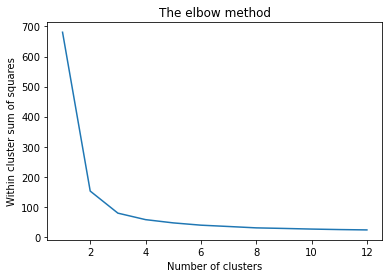

In [33]:
plt.plot(range(1,13),list)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares')
plt.show()

In [35]:
kMeans = KMeans(n_clusters=3, init='k-means++', max_iter=500, n_init=10, random_state=0)
ykMeans = kMeans.fit_predict(x)

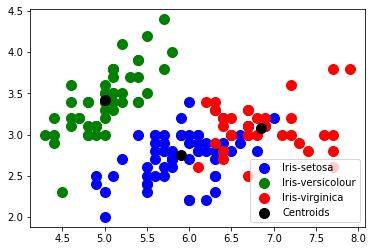

In [43]:
plt.scatter(x[ykMeans == 0, 0], x[ykMeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[ykMeans == 1, 0], x[ykMeans == 1, 1], 
            s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(x[ykMeans == 2, 0], x[ykMeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()